In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [2]:
data = pd.read_csv('HeartDiseaseTrain-Test.csv')
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [3]:
data.sample(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
349,62,Female,Non-anginal pain,130,263,Lower than 120 mg/ml,ST-T wave abnormality,97,No,1.2,Flat,One,Reversable Defect,0
628,69,Female,Asymptomatic,140,239,Lower than 120 mg/ml,ST-T wave abnormality,151,No,1.8,Downsloping,Two,Fixed Defect,1
641,56,Female,Typical angina,134,409,Lower than 120 mg/ml,Normal,150,Yes,1.9,Flat,Two,Reversable Defect,0
538,46,Male,Typical angina,120,249,Lower than 120 mg/ml,Normal,144,No,0.8,Downsloping,Zero,Reversable Defect,0
415,41,Female,Atypical angina,130,204,Lower than 120 mg/ml,Normal,172,No,1.4,Downsloping,Zero,Fixed Defect,1
787,51,Male,Typical angina,140,298,Lower than 120 mg/ml,ST-T wave abnormality,122,Yes,4.2,Flat,Three,Reversable Defect,0
643,65,Male,Typical angina,120,177,Lower than 120 mg/ml,ST-T wave abnormality,140,No,0.4,Downsloping,Zero,Reversable Defect,1
574,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
733,44,Female,Non-anginal pain,108,141,Lower than 120 mg/ml,ST-T wave abnormality,175,No,0.6,Flat,Zero,Fixed Defect,1
228,52,Male,Atypical angina,128,205,Greater than 120 mg/ml,ST-T wave abnormality,184,No,0.0,Downsloping,Zero,Fixed Defect,1


In [4]:
print("Dataset Shape:", data.shape)
print("Null Values:\n", data.isnull().sum())
data.describe()

Dataset Shape: (1025, 14)
Null Values:
 age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [5]:

le = LabelEncoder()
cat_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 
            'rest_ecg', 'exercise_induced_angina', 'slope',
            'vessels_colored_by_flourosopy', 'thalassemia']

for col in cat_cols:
    data[col] = le.fit_transform(data[col])


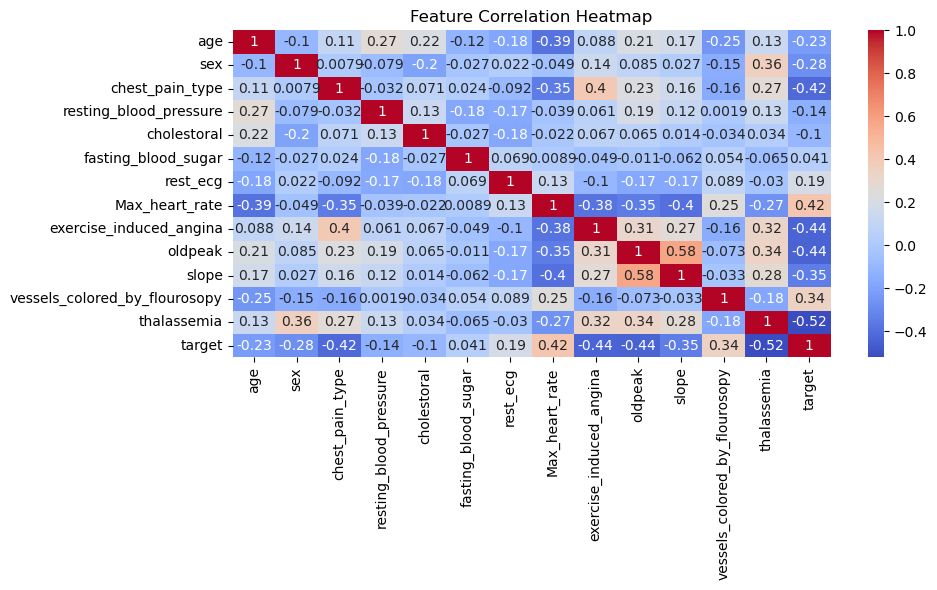

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [7]:
X = data.drop('target', axis=1)
y = data['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_preds = log_reg.predict(X_test)

In [12]:
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))


Logistic Regression Results:
Accuracy: 0.7951219512195122
Confusion Matrix:
 [[76 26]
 [16 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.78       102
           1       0.77      0.84      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [13]:
log_probs = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, log_probs)

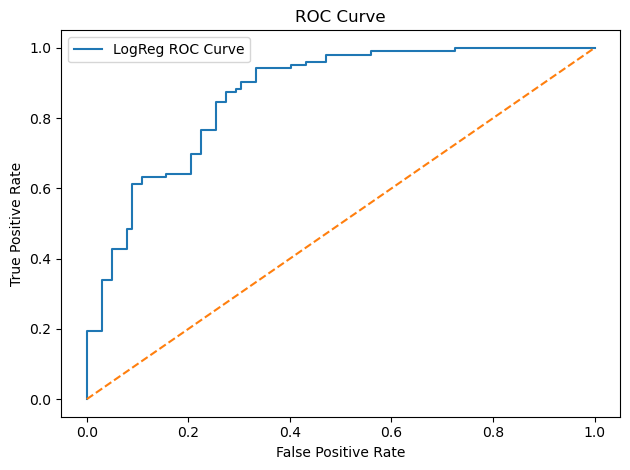

In [14]:
plt.figure()
plt.plot(fpr, tpr, label='LogReg ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()

In [15]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_preds))



Random Forest Accuracy: 0.9853658536585366
